## Deep Learning Module End

#### *Objective:*

To model the progression of diabetes using the available independent
variables. This model will help healthcare professionals understand how different factors
influence the progression of diabetes and potentially aid in designing better treatment
plans and preventive measures. The model will provide insights into the dynamics of
diabetes progression in patients.

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

import tensorflow as tf
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [12]:
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df["target"] = diabetes.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [13]:
X = diabetes.data
y = diabetes.target

In [14]:
df.isnull().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### *Exploratory Data Analysis (EDA)*

In [16]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


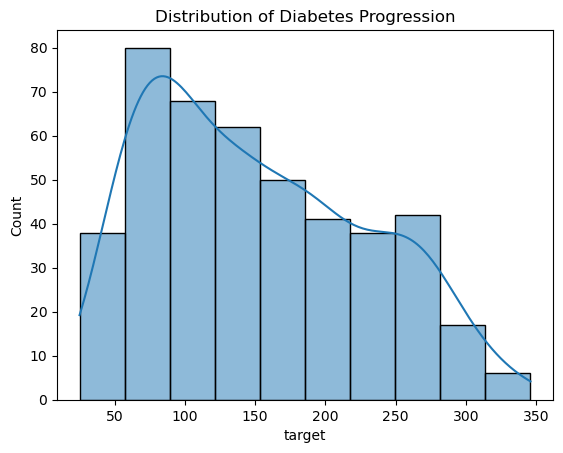

In [17]:
plt.figure()
sns.histplot(df['target'], kde=True)
plt.title("Distribution of Diabetes Progression")
plt.show()

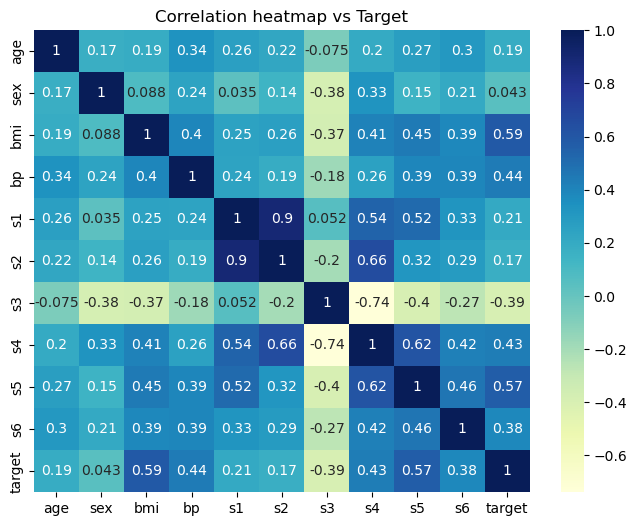

In [18]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')
plt.title("Correlation heatmap vs Target")
plt.show()

### *Building the ANN Model*

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [20]:
model = Sequential([
    Input(shape=(X_scaled.shape[1],)),
    Dense(32 , activation='relu'),
    Dense(16 , activation='relu'),
    Dense(1)

])

### *Training the ANN Model*

In [21]:
model.compile(
    optimizer=Adam(learning_rate=0.01),
    loss='mse',
    metrics=['mae']
)

In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 897 (3.50 KB)

 Trainable params: 897 (3.50 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
history = model.fit(
    X_train, y_train,
    epochs=90,
    batch_size=15,
    validation_split=0.2,
    verbose=1
)

Epoch 1/90
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 30139.3945 - mae: 154.1790 - val_loss: 19154.8125 - val_mae: 122.0196
Epoch 2/90
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 20750.7324 - mae: 123.5386 - val_loss: 8275.0859 - val_mae: 71.6738
Epoch 3/90
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6918.2363 - mae: 64.6827 - val_loss: 3755.8037 - val_mae: 48.7387
Epoch 4/90
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4643.5513 - mae: 53.9320 - val_loss: 3393.9482 - val_mae: 43.4005
Epoch 5/90
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3885.5474 - mae: 48.8518 - val_loss: 3053.2869 - val_mae: 41.8518
Epoch 6/90
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3439.7896 - mae: 46.2801 - val_loss: 2941.4370 - val_mae: 41.3025
Epoch 7/90
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3257.0195 - mae: 45.4449 - val_loss: 2904.4182 - val_mae: 42.6759
Epoch 8/90
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3144.7488 - mae: 44.9055 - val_loss: 2856.2366 - val_mae: 41.9640
E

### *Evaluating the Model*

In [24]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Mean Squared Error: 2939.0647863069976
R2 Score: 0.44526602373556223


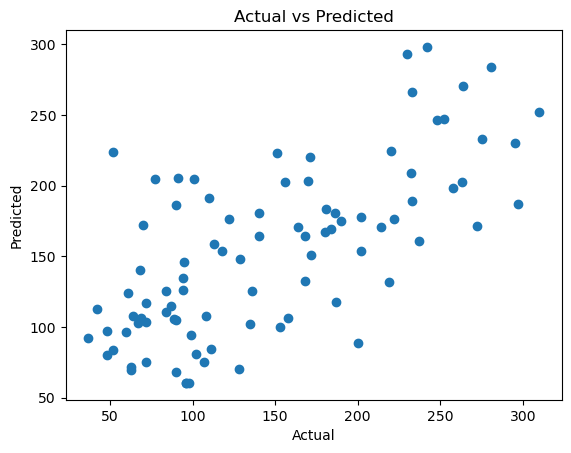

In [25]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

### *Improving the Model*

In [34]:
from tensorflow.keras import Input

model_improvised = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(64 , activation='relu'),
    Dense(32 , activation='relu'),
    Dense(1)
])

model_improvised.compile(
    optimizer = 'adam',
    loss = 'mean_squared_error',
    metrics = ['mean_absolute_error']
)

from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',   
    patience=20,           
    restore_best_weights=True  
)

history2 = model_improvised.fit(
    X_train, y_train,
    epochs=200,
    batch_size=3,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/200
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 30693.8945 - mean_absolute_error: 156.2590 - val_loss: 20802.1152 - val_mean_absolute_error: 128.2283
Epoch 2/200
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 25097.9121 - mean_absolute_error: 139.3444 - val_loss: 14210.4814 - val_mean_absolute_error: 102.9057
Epoch 3/200
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12722.8037 - mean_absolute_error: 91.8601 - val_loss: 6039.9185 - val_mean_absolute_error: 57.7578
Epoch 4/200
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5866.5444 - mean_absolute_error: 59.4288 - val_loss: 4024.0295 - val_mean_absolute_error: 46.2437
Epoch 5/200
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4714.8584 - mean_absolute_error: 53.9160 - val_loss: 3719.4150 - val_mean_absolute_error: 44.5787
Epoch 6/200
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4169.8096 - mean_absolute_error: 50.9150 - val_loss: 3458.0269 - val_mean_absolute_error: 43.2281
Epoch 7/200
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/ste

In [36]:
y_pred = model_improvised.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R2:", r2)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
MSE: 2750.2576189073484
R2: 0.4809024449559458


The ANN model successfully modeled the progression of diabetes using clinical features from the sklearn dataset. After preprocessing and normalization, a multi-layer neural network was trained and evaluated using MSE and R² metrics. Model performance improved through hyperparameter tuning, regularization, and early stopping. The final model provides meaningful output.